In [1]:
import numpy as np
import pandas as pd
from spec_id import Likelihood_contours, Median_w_Error, Gen_spec
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [40]:
tDB = galDB.sort_values('Z')

In [4]:
restc_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
restc_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')

In [41]:
b_band = []
i_band = []
j_band = []

for i in tDB.index:
    if tDB['gids'][i][0] == 's':
        b_band.append(restc_s[tDB['ids'][i]-1]['L154'])
        i_band.append(restc_s[tDB['ids'][i]-1]['L139'])
        j_band.append(restc_s[tDB['ids'][i]-1]['L161'])
    if tDB['gids'][i][0] == 'n':
        b_band.append(restc_n[tDB['ids'][i]-1]['L154'])
        i_band.append(restc_n[tDB['ids'][i]-1]['L139'])
        j_band.append(restc_n[tDB['ids'][i]-1]['L161'])
        
b_band = np.array(b_band)
i_band = np.array(i_band)
j_band = np.array(j_band)

In [42]:
BI = 2.5*np.log10(i_band/b_band)
IJ = 2.5*np.log10(j_band/i_band)

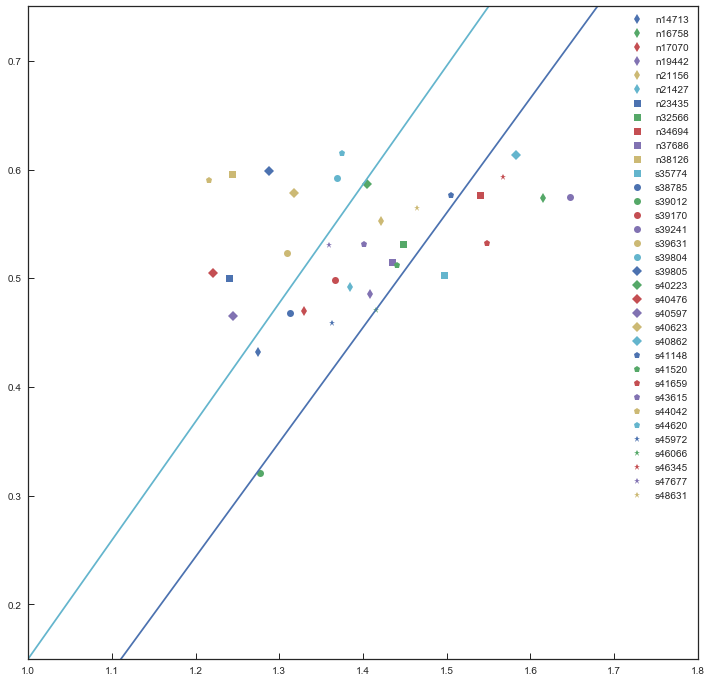

In [43]:
%matplotlib inline

p=['d','d','d','d','d','d','s','s','s','s','s','s','o','o','o','o','o','o','D','D','D','D','D','D',
   'p','p','p','p','p','p','*','*','*','*','*','*']

plt.figure(figsize=[12,12])
for i in range(len(galDB.index)):
    plt.plot(BI[i],IJ[i],p[i],label = galDB['gids'][galDB.index[i]])
plt.plot(np.arange(1,1.8,.05),lin_2p([1,.15],[1.55,.75]))
plt.plot(np.arange(1,1.8,.05),lin_2p([1.111,.15],[1.68,.75]))
plt.axis([1,1.8,.15,0.75])
plt.legend()
plt.show()
plt.close()

In [23]:
def lin_2p(p1,p2):
    x1=p1[0]
    y1=p1[1]
    x2=p2[0]
    y2=p2[1]    
    
    x = np.arange(1,1.8,.05)
    y=((y1-y2)/(x1-x2)) * (x - x1) + y1
    return y